### Переключение между code и markdown при помощи esc+m, esc+y

### Загрузим основные пакеты

In [1]:
import scipy as sp
import scipy.linalg as spla
import scipy.optimize as spopt
import scipy.stats as spst

import numpy as np
import numpy.linalg as npla

import statsmodels as sm
import statsmodels.api as sma
smfOLS = sma.regression.linear_model.OLS.from_formula
smfLGT = sm.discrete.discrete_model.Logit.from_formula

import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt

from inspect import signature as sig

In [2]:
# matplotlib image size and resolution
mpl_options = {"figsize":(8,8), "dpi":100}
sb.set(rc={'figure.figsize':(8,8)})

### Чтобы понять, что такое логистическая регрессия, надо понять, откуда она взялась
### Обычно мы пытаемся провести прямую через облако точек, когда объясняющие переменные распределены непрерывно или дискретно. Но переменная Y всегда как будто непрерывная.
### Скажем, "Income ~ Age + YearsEducation" или "LifeExpectancy ~ Income"
### Заодно потренируемся в симуляциях

In [3]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

y = 3.45*x + eps

<AxesSubplot:>

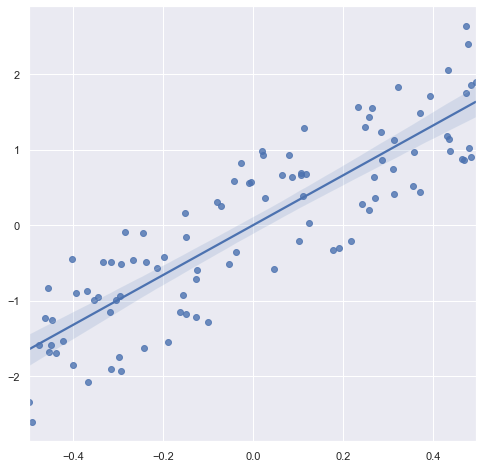

In [4]:
sb.regplot(x=x, y=y)

In [5]:
df = pd.DataFrame([])
df['Income']=x
df['Age']=y
model = smfOLS("Income ~ Age", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     301.0
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.23e-31
Time:                        10:09:27   Log-Likelihood:                 46.526
No. Observations:                 100   AIC:                            -89.05
Df Residuals:                      98   BIC:                            -83.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.353e-16      0.015   8.82e-15      1.000      -0.030       0.030
Age            0.2286      0.013     17.349      0.000       0.202       0.255
==============================================================================
Omnibus:                       21.527   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.453
Skew:                           0.165   Prob(JB):                       0.0654
Kurtosis:                       1.905   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### А что если переменная Y принимает значения 0 или 1. Скажем, решение пойти в университет?
### Попробуем провести такую регрессию

In [6]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

y = (np.sign(3.45*x + eps)+1)/2

<AxesSubplot:>

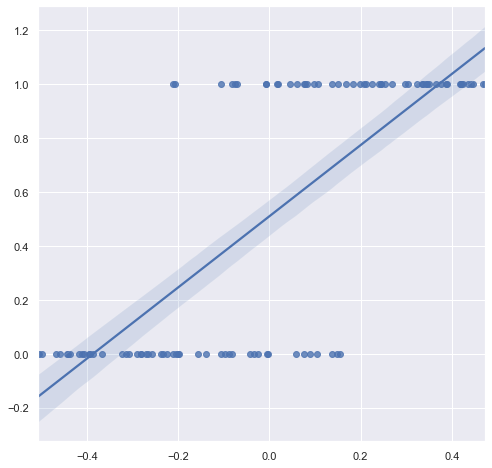

In [7]:
sb.regplot(x=x, y=y)

In [8]:
df = pd.DataFrame([])
df['Income']=x
df['Univ'] = y
model = smfOLS("Univ ~ Income", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Univ   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.80e-19
Time:                        10:09:27   Log-Likelihood:                -31.255
No. Observations:                 100   AIC:                             66.51
Df Residuals:                      98   BIC:                             71.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5100      0.033     15.265      0.000       0.444       0.576
Income         1.3199      0.118     11.219      0.000       1.086       1.553
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.188
Skew:                          -0.046   Prob(JB):                        0.910
Kurtosis:                       2.808   Cond. No.                         3.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Получается какая то ерунда
### Непонятно как интерпретировать коэффициент... и не очень понятно что такое fitted values
### Было бы здорово предсказать что то типа вероятности, что то в [0,1]
### И еще было бы здорово иметь много регрессоров, и чтобы все это было выпуклой задачей...

<AxesSubplot:>

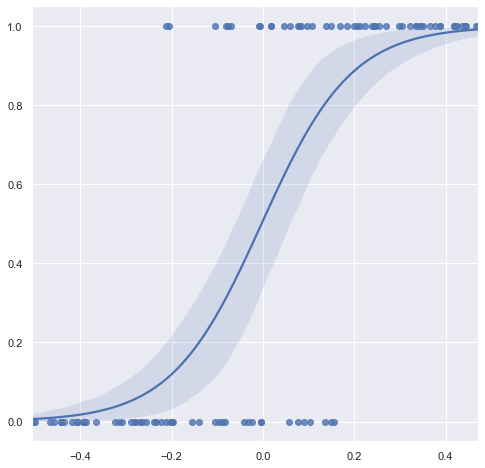

In [9]:
sb.regplot(x=x, y=y, logistic = True)

In [10]:
df = pd.DataFrame([])
df['Income']=x
df['Univ']=y
model = smfLGT("Univ ~ Income", data=df)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.326222
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Univ   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5292
Time:                        10:09:31   Log-Likelihood:                -32.622
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 1.089e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0332      0.314      0.106      0.916      -0.582       0.649
Income        10.1320      1.942      5.218      0.000       6.326      13.937
==============================================================================
"""

### Классическая интерпретация регрессий это то, что мы пытаемся приблизить некоторый теоретический объект
- обычная регрессия это линейное (по ковариатом) условное матожидание: $$E[Y|X]=\beta' X$$
- логистическая регрессия это линейная (по ковариатам) вероятность: $$Pr(Y=1|X)=\frac{1}{1+\exp(-\beta' X)}$$

### Дело в том, что $F(z)=\frac{1}{1+\exp(-z)}$ это монотонное преобразование с образом в [0,1]. То есть оно сплющивает прямую так, чтобы она влезла между 0 и 1, и получается как будто регрессия. Но как провести такую кривую оптимальным образом??? Должна быть какая то оптимизация... А что есть оптимизация в обыкновенной регрессии?

### На самом деле, и обыкновенная регрессия и логистическая являются применением метода Максимум Лайклихуд к стохастически распределенным данным
- обычная регрессия это максимум лайклихуд по наблюдениям $y_i$ где $$y_i = \beta x_i + \sigma \varepsilon, \quad \varepsilon \sim \mathcal{N}(0,1)$$
- логистическая регрессия это максимум лайклихуд по наблюдениям $I(y_i>0)$ где $$y_i = \beta x_i + \sigma \varepsilon, \quad \varepsilon \sim Logistic$$ где Logistic эдакое распределение с функцией распределения $F(z)=\frac{1}{1+\exp(-z)}$

### Существует общая теорема, утверждающая что оценки максимум лайклихуд состоятельно оценивают истинные теоретические объекты, то есть максимум лайклихуд нормального оценит условное распределение, а максимум лайклихуд логистического условную вероятность: Abraham Wald, (1949), Note on the Consistency of the Maximum Likelihood Estimate, Ann. Math. Stat.

### Только надо убедиться, что это действительно те самые теоретические объекты:

- обычная регрессия: $$\mathbb{E}[y_i|x_i] = \beta' x_i + \sigma \mathbb{E}[\varepsilon|x_i]=\beta' x_i$$
- логистическая регрессия: $$Pr(y_i=1) = \mathbb{E}[y_i>0|x_i] = \mathbb{E}[\varepsilon_i>(-\beta' x_i)/\sigma|x_i]=$$ 
$$= \mathbb{E}[-\tilde\varepsilon_i>(-\beta' x_i)/\sigma|x_i]= \mathbb{E}[\tilde\varepsilon_i<(\beta' x_i)/\sigma|x_i]=F(\beta' x_i/\sigma)$$
где $\tilde \varepsilon=-\varepsilon$, они распределены одинаково из симметрии

### Потренируемся считать разные лайклихуды
- нормальная плотность: $$f_{nor}(\varepsilon)=\frac{1}{\sqrt{2 \pi}}\exp^{\frac{-\varepsilon^2}{2}} \quad \Rightarrow \quad \mathcal{LL}=\sum_{i=1}^n \frac{-\varepsilon_i^2}{2} + K = \frac{-1}{\sigma^2} \sum (y_i - \beta' x_i)^2 + K \to \max_{\beta}$$
- логистическая плотность: $$F_{log}(\varepsilon)=\frac{1}{1+\exp^{-\varepsilon}}=1-F_{log}(-\varepsilon) \quad \Rightarrow \quad \mathcal{L}=\prod F^{y_i}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{1-y_i}$$
$$ \mathcal{LL} = \sum_{y_i = 1} \log \frac{1}{1+\exp(-\beta' x_i /\sigma)} + \sum_{y_i = 0} \log \frac{\exp(-\beta' x_i /\sigma)}{1+\exp(-\beta' x_i /\sigma)} \to \max_{\beta}$$
$$ \mathcal{LL} = \sum_{y_i = 1} \log \frac{1}{1+\exp(-\beta' x_i /\sigma)} + \sum_{y_i = 0} \log \frac{1}{1+\exp(\beta' x_i /\sigma)} \to \max_{\beta}$$
### Ничего не узнаете?

### Мы упустили один важный момент - это выпуклость. В отличие от OLS, у логистической регрессии нет аналитического решения, но это не страшно если задача выпуклая. Все численные методы в выпуклых задачах сходятся к одним и тем же ответам. 
$$ \mathcal{LL} = \sum_{y_i = 0} (-\beta' x_i /\sigma) - \sum_{all} \log(1+\exp(-\beta' x_i /\sigma)) \to \max_{\beta}$$
### Дело в том, что $\log(1+\exp(-z))$ это еще помимо всего прочего лог-выпуклое преобразование, то есть вторая производная от ее логарифма положительна. А значит весь логлайклихуд (но не сам лайклихуд) вогнутый!

### Наконец, если основной лоджит выпуклая задача, то лоджит с пенализацией тоже выпуклая!
- обычная регрессия: $$ \quad Loss = \frac{1}{2n}\sum (y_i - \beta' x_i)^2 + a * ||w||_1 + b * ||w||^2_2 \to \min_{\beta}, \quad \text{где} \quad l1_{ratio} = \frac{a}{a+b}, \quad \alpha=a+b$$
- логистическая регрессия: $$ \quad Loss = \sum \log(1+\exp(-y_i \beta' x_i)) + a * ||w||_1 + b * ||w||^2_2 \to \min_{\beta}, \quad \text{где} \quad l1_{ratio} = \frac{a}{a+b}, \quad C=a+b$$

### Осторожно, тут в лоджите $y_i$ принимает значения в $\{-1,1\}$, так больше принято в CS
### Убедитесь что в ваш пакет ожидает те значения $y$ которые вы ему подаете на вход

In [1]:
def OLS_loss(Y, X, beta, a, b):
    z = Y - X@beta
    return np.square(z).sum()/(2*Y.size) + a*np.abs(beta).sum() + b*np.square(beta).sum()

def LGT_loss(Y, X, beta, a, b):
    z = -Y*X@beta
    o = np.ones(Y.size)
    return np.logaddexp(o, z).sum() + a*np.abs(beta).sum() + b*np.square(beta).sum()

### Попробуем sklearn

In [19]:
from sklearn.linear_model import Ridge as skRidge
from sklearn.linear_model import Lasso as skLasso
from sklearn.linear_model import ElasticNet as skEN

from sklearn.linear_model import LogisticRegression as skLGT

In [20]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

# внимание тут -1 и 1
y = np.sign(3.45*x + eps)
x = x.reshape(100, 1)

In [21]:
# Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance
x.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [22]:
sig(skLGT)

<Signature (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)>

In [2]:
sk_options={'penalty':'elasticnet', 'solver':'saga', 
            'fit_intercept':True, 'l1_ratio':.5, 
            'verbose':1, 'n_jobs':10}

In [4]:
model = skLGT(**sk_options).fit(x,y)
model.intercept_, model.coef_

NameError: name 'skLGT' is not defined

### sklearn это CS, поэтому он ожидает -1,1 но если вы подадите ему 0,1 он не включит тревогу 
### seaborn это Econ, поэтому он ожидает 0,1 но включит тревогу если получит -1,1
### будте аккуратны

### еще один момент это так называемые средние эффекты или Average Marginal Effects
- обычная регрессия $$\mathbb{E}_x[\frac{\mathbb{E}_{\varepsilon}[Y|X]}{\partial X}] = \mathbb{E}_x[\beta] = \beta$$
- логистическая регрессия $$\mathbb{E}_x[\frac{Prob_{\varepsilon}(Y=1|X)}{\partial X}] = \mathbb{E}_x[\frac{F(\beta' X)}{\partial X}] = \beta * \mathbb{E}_x[f(\beta' X)] \approx \frac{\beta}{n} \sum_{i=1}^n \frac{\exp^{-\beta' x_i}}{(1+\exp^{-\beta' x_i})^2}$$

### в обычной регрессии локальный эффект не зависит от $x$ (какая то демография), поэтому средний эффект равен локальному, а в логистической нет, поэтому есть разделение этих двух понятий. Как экономистов нас, конечно же, интересует всегда средний (по стране) эффект.